As mentionned in [logbook May-23](/posts/2023-05-01-logbook-May-23.html#jupyter-4.0-is-out), jupyter lab v4 is now available.

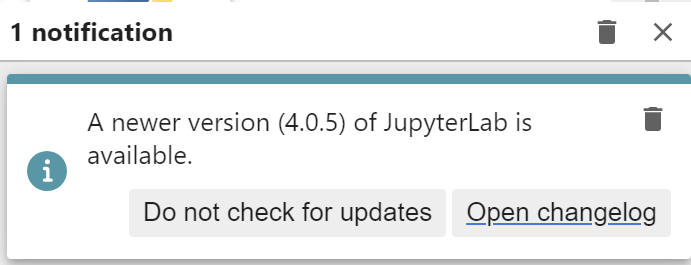

# My jupyter lab v3 config, creation of a test config to update jupyter lab to v4

## base_jupyter (jupyter lab v3)

As I explained in [my WSL setup](/posts/2022-12-15-wsl2-fresh-pc.html#jupyter-lab), I run jupyterlab from `base_jupyter` a specific python environment with this defintion:


In [2]:
!cat ~/_conda_env/base_jupyter.txt

conda remove --name base_jupyter --all
mamba create -n base_jupyter  -c conda-forge -y python=3.10 
conda activate base_jupyter
mamba install -c conda-forge "jupyterlab<4.0" "ipywidgets>=7.6, <8.0"
#at that step tqdm should work https://github.com/tqdm/tqdm/issues/1310
mamba install -c conda-forge -c plotly -y jupyter-dash
mamba install -c conda-forge -y ipykernel 'jupyterlab_execute_time<3.0'
python -m ipykernel install --user --name=base_jupyter
#jupyter labextension install jupyterlab-plotly

jupyter-lab --generate-config
# in .jupyter/jupyter_lab_config.py
# replace # c.ServerApp.use_redirect_file = True
# with c.ServerApp.use_redirect_file = False
# or get it from gitlab/JANUS/dotfiles

#check nodejs installation using nvm
#e.g. nvm install 18.16.0
#  nvm alias default 18.16.0
#  node -v
# et pour le CA
# npm config set cafile  /home/guillaume/miniconda/lib/python3.9/site-packages/certifi/cacert.pem
jupyter lab build --minimize=False

mamba install -c pyviz pyviz_comms


And here are the versions of packages used in this environment

```bash
❯ conda list|grep jupyter
# packages in environment at /home/guillaume/miniconda/envs/base_jupyter:
jupyter-dash              0.4.2              pyhd8ed1ab_1    conda-forge
jupyter_client            8.2.0              pyhd8ed1ab_0    conda-forge
jupyter_core              5.3.1           py310hff52083_0    conda-forge
jupyter_events            0.6.3              pyhd8ed1ab_0    conda-forge
jupyter_server            2.6.0              pyhd8ed1ab_0    conda-forge
jupyter_server_fileid     0.9.0              pyhd8ed1ab_0    conda-forge
jupyter_server_terminals  0.4.4              pyhd8ed1ab_1    conda-forge
jupyter_server_ydoc       0.8.0              pyhd8ed1ab_0    conda-forge
jupyter_ydoc              0.2.4              pyhd8ed1ab_0    conda-forge
jupyterlab                3.6.4              pyhd8ed1ab_0    conda-forge
jupyterlab_execute_time   2.3.1              pyhd8ed1ab_0    conda-forge
jupyterlab_pygments       0.2.2              pyhd8ed1ab_0    conda-forge
jupyterlab_server         2.23.0             pyhd8ed1ab_0    conda-forge
jupyterlab_widgets        1.1.4              pyhd8ed1ab_0    conda-forge
```

## base_jupyter_v4 (jupyter lab v4)

Because I don't want to ruin my config, I will create a new specfic environment `base_jupyter_v4`

and keep my jupyter config:

`mv .jupyter .jupyter_backup_20230824`

```bash
# stop running jupyter lab instance
sudo systemctl stop jupyterlab

conda remove --name base_jupyter_v4 --all
mamba create -y -n base_jupyter_v4 -c conda-forge python=3.10
conda activate base_jupyter_v4
mamba install -c conda-forge jupyterlab ipywidgets --yes
```

This setup brings these versions:

```bash
❯ conda list|grep jupyter
# packages in environment at /home/guillaume/miniconda/envs/base_jupyter_v4:
jupyter-lsp               2.2.0              pyhd8ed1ab_0    conda-forge
jupyter_client            8.3.0              pyhd8ed1ab_0    conda-forge
jupyter_core              5.3.1           py310hff52083_0    conda-forge
jupyter_events            0.7.0              pyhd8ed1ab_2    conda-forge
jupyter_server            2.7.1              pyhd8ed1ab_0    conda-forge
jupyter_server_terminals  0.4.4              pyhd8ed1ab_1    conda-forge
jupyterlab                4.0.5              pyhd8ed1ab_0    conda-forge
jupyterlab_pygments       0.2.2              pyhd8ed1ab_0    conda-forge
jupyterlab_server         2.24.0             pyhd8ed1ab_0    conda-forge
jupyterlab_widgets        3.0.8              pyhd8ed1ab_0    conda-forge
```

Let's see what works or not from this installation.

`jupyer lab`



# [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed (_ssl.c:1007)

This is happening when starting jupyterlab, will run [this workaround](/posts/2022-09-06-ssl-certificate_verify_failed.html?q=certificate%20verify%20failed#to-be-reexecuted-after-certifi-update)

```bash
conda activate base_jupyter_v4
pip list|grep certifi
pip install -U certifi
pip list|grep certifi
export SSL_CERT_FILE=`python -c 'import certifi;print(certifi.where())'`

export TMPDIR=`mktemp -d`
git clone git@gitlab.michelin.com:DEV/bib-certificates.git $TMPDIR
cd $TMPDIR
cat *trust-ca.pem >> $SSL_CERT_FILE
```

Ok this fixes this issue

# console output broken

When starting jupyter lab, output is broken

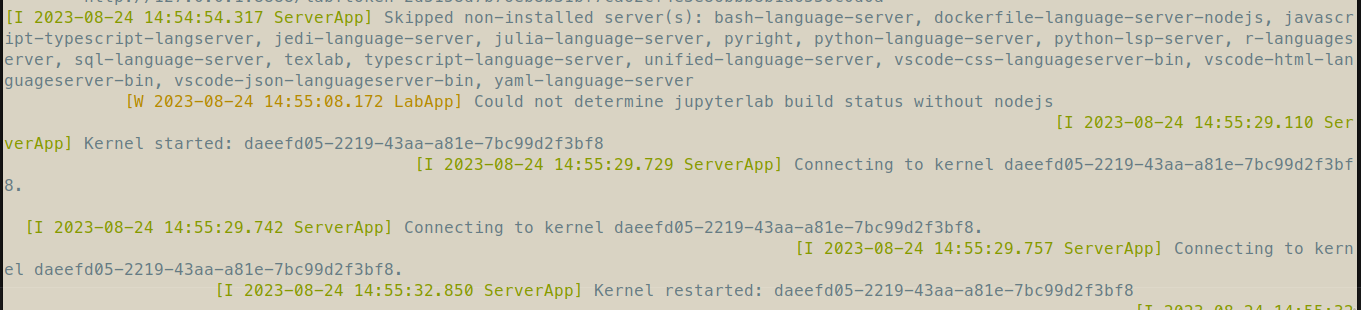

Cannot quit (Ctrl-C ineffective) and after a kill the zsh session is broken. Have to restart.


# TQDM

Just With this simple code,


```python
from tqdm.notebook import trange, tqdm
from time import sleep

for i in trange(3, desc='1st loop'):
    for j in tqdm(range(100), desc='2nd loop'):
        sleep(0.01)

````
I get
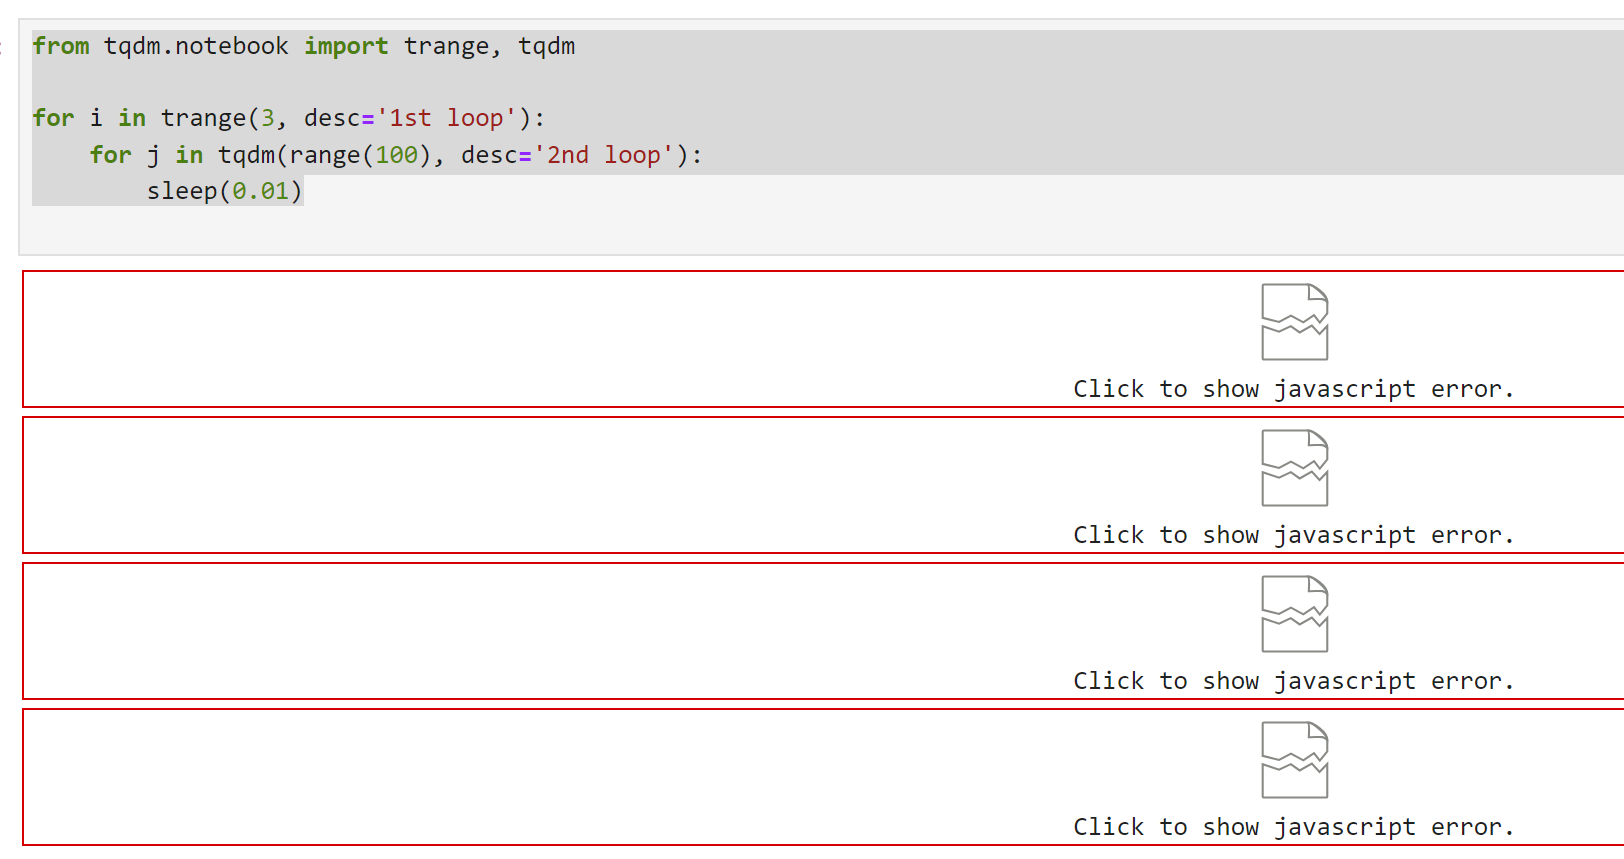

And error message is:

```text
[Open Browser Console for more detailed log - Double click to close this message]
Failed to load model class 'HBoxModel' from module '@jupyter-widgets/controls'
Error: Module @jupyter-widgets/controls, version ^1.5.0 is not registered, however,         2.0.0 is
    at f.loadClass (http://localhost:8888/lab/extensions/@jupyter-widgets/jupyterlab-manager/static/134.b4eddbb09f5fd50a4007.js?v=b4eddbb09f5fd50a4007:1:75055)
    at f.loadModelClass (http://localhost:8888/lab/extensions/@jupyter-widgets/jupyterlab-manager/static/336.9f709c2076672b1bfe2b.js?v=9f709c2076672b1bfe2b:1:10729)
    at f._make_model (http://localhost:8888/lab/extensions/@jupyter-widgets/jupyterlab-manager/static/336.9f709c2076672b1bfe2b.js?v=9f709c2076672b1bfe2b:1:7517)
    at f.new_model (http://localhost:8888/lab/extensions/@jupyter-widgets/jupyterlab-manager/static/336.9f709c2076672b1bfe2b.js?v=9f709c2076672b1bfe2b:1:5137)
    at f.handle_comm_open (http://localhost:8888/lab/extensions/@jupyter-widgets/jupyterlab-manager/static/336.9f709c2076672b1bfe2b.js?v=9f709c2076672b1bfe2b:1:3894)
    at _handleCommOpen (http://localhost:8888/lab/extensions/@jupyter-widgets/jupyterlab-manager/static/134.b4eddbb09f5fd50a4007.js?v=b4eddbb09f5fd50a4007:1:73471)
    at y._handleCommOpen (http://localhost:8888/static/lab/jlab_core.5f8e30c3b3cb076c81d8.js?v=5f8e30c3b3cb076c81d8:1:1235935)
    at async y._handleMessage (http://localhost:8888/static/lab/jlab_core.5f8e30c3b3cb076c81d8.js?v=5f8e30c3b3cb076c81d8:1:1237925)
```

Here are the versions used:
```bash
❯ conda list|grep widget
ipywidgets                8.1.0              pyhd8ed1ab_0    conda-forge
jupyterlab_widgets        3.0.8              pyhd8ed1ab_0    conda-forge
widgetsnbextension        4.0.8              pyhd8ed1ab_0    conda-forge
```